In [ ]:
feats_to_keep = [
  'texture error', 'worst fractal dimension'#, 'radius_error'
]

Acurácia: 0.8421052631578947
F1 Score: 0.8615384615384616
Matriz de Confusão:
 [[40  3]
 [15 56]]
ROC AUC: 0.8594824762528659


<Figure size 800x600 with 0 Axes>

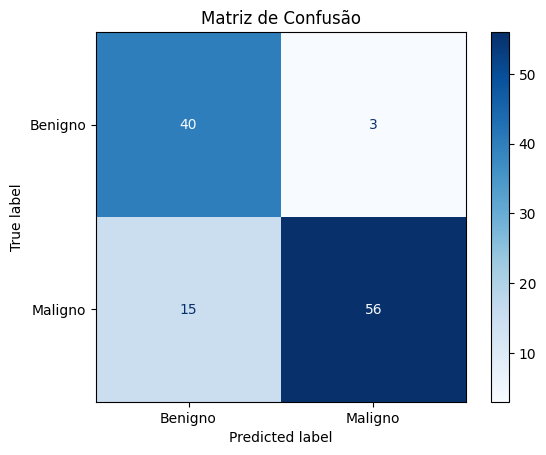

<Figure size 800x600 with 0 Axes>

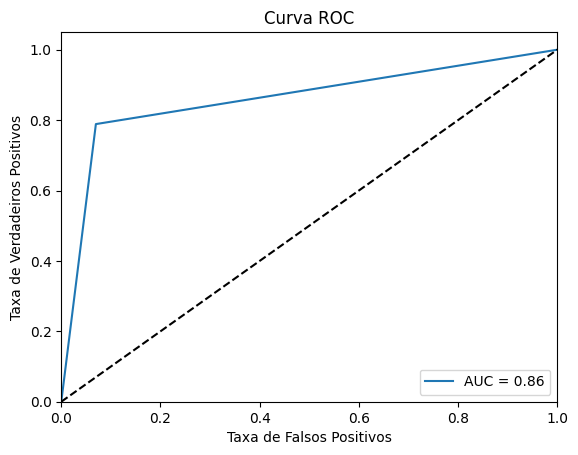

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

# Carregando o conjunto de dados de câncer de mama
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)[feats_to_keep]
y = data.target

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo de árvore de decisão simples
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X_train, y_train)

# Avaliando o modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Acurácia:", accuracy)
print("F1 Score:", f1)
print("Matriz de Confusão:\n", conf_matrix)
print("ROC AUC:", roc_auc)

# Plotando a matriz de confusão com valores numéricos usando ConfusionMatrixDisplay
plt.figure(figsize=(8, 6))
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Benigno', 'Maligno'])
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()

# Plotando a curva ROC com o AUC usando RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot()
plt.plot([0, 1], [0, 1], 'k--')  # Adicionando a linha diagonal para referência
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show()

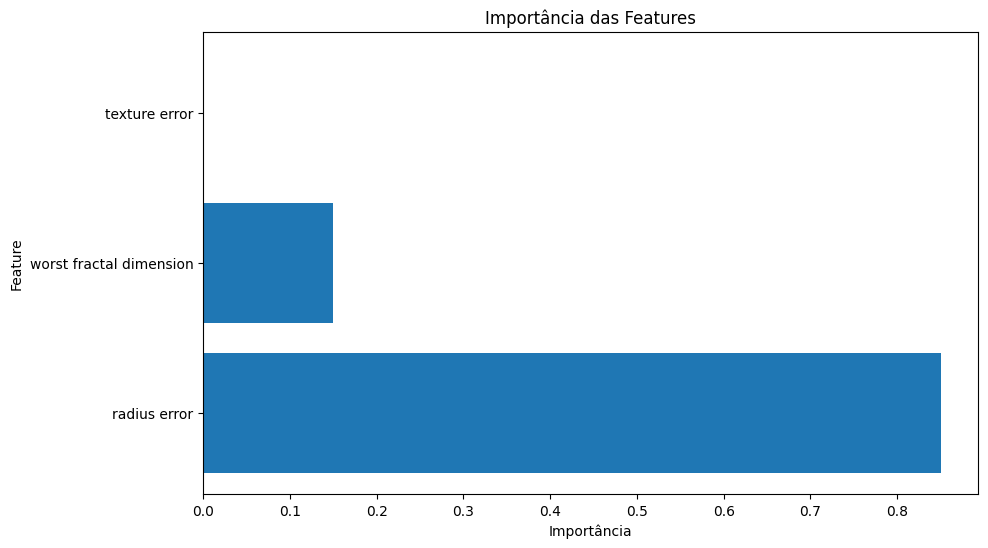

In [ ]:
# Plotando a importância das features
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das Features')
plt.show()

In [ ]:
feature_importance_df.iloc[-3:]['Feature'].tolist()

['radius error', 'texture error', 'worst fractal dimension']